In [8]:
#----------------------------
# K-Fold Classification
#----------------------------

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,
    ConfusionMatrixDisplay, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv("/content/drive/My Drive/nutrients_csvfile.csv")  # change path if needed
print("✅ Dataset Loaded Successfully!")
print(data.shape)
print(data.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Dataset Loaded Successfully!
(335, 10)
                    Food Measure  Grams Calories Protein Fat Sat.Fat Fiber  \
0             Cows' milk   1 qt.    976      660      32  40      36     0   
1              Milk skim   1 qt.    984      360      36   t       t     0   
2             Buttermilk   1 cup    246      127       9   5       4     0   
3  Evaporated, undiluted   1 cup    252      345      16  20      18     0   
4         Fortified milk  6 cups  1,419    1,373      89  42      23   1.4   

  Carbs        Category  
0    48  Dairy products  
1    52  Dairy products  
2    13  Dairy products  
3    24  Dairy products  
4   119  Dairy products  


In [14]:
numeric_cols = ['Grams', 'Calories', 'Protein', 'Fat', 'Sat.Fat', 'Fiber', 'Carbs']

def clean_numeric_columns(df, cols):
    for col in cols:
        df[col] = (
            df[col].astype(str)
            .str.replace(r'[^0-9.\-]', '', regex=True)
        )
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

data = clean_numeric_columns(data, numeric_cols)
data = data.dropna(subset=numeric_cols)
data = data.drop_duplicates()
print("✅ Cleaned Data Shape:", data.shape)
data.head()

✅ Cleaned Data Shape: (171, 11)


,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category,Protein_Level
0,Cows' milk,1 qt.,976,660.0,32.0,40.0,36.0,0.0,48.0,Dairy products,High
2,Buttermilk,1 cup,246,127.0,9.0,5.0,4.0,0.0,13.0,Dairy products,High
3,"Evaporated, undiluted",1 cup,252,345.0,16.0,20.0,18.0,0.0,24.0,Dairy products,High
4,Fortified milk,6 cups,1419,1373.0,89.0,42.0,23.0,1.4,119.0,Dairy products,High
5,Powdered milk,1 cup,103,515.0,27.0,28.0,24.0,0.0,39.0,Dairy products,High


In [10]:
median_protein = data['Protein'].median()
data['Protein_Level'] = np.where(data['Protein'] >= median_protein, 'High', 'Low')

print("Median Protein Value:", median_protein)
print(data['Protein_Level'].value_counts())

Median Protein Value: 8.0
Protein_Level
High    88
Low     83
Name: count, dtype: int64


In [11]:
X = data.drop(columns=['Protein', 'Protein_Level', 'Food', 'Measure', 'Category'])
y = data['Protein_Level']

# Encode target (High=1, Low=0)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Features and target prepared!")
print("Feature shape:", X_scaled.shape)

✅ Features and target prepared!
Feature shape: (171, 6)


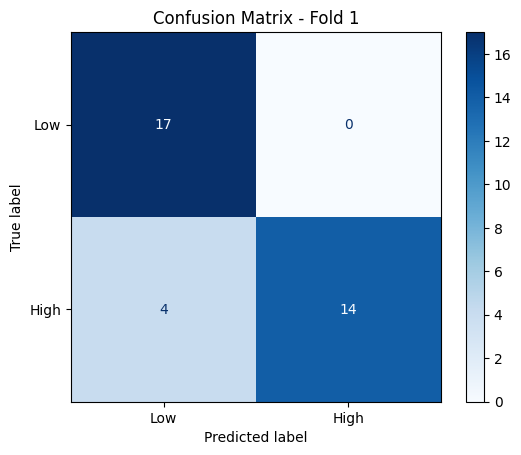


📊 Fold 1 Metrics:
Accuracy:  0.886
Precision: 1.000
Recall:    0.778
F1-Score:  0.875

Classification Report:
               precision    recall  f1-score   support

         Low       0.81      1.00      0.89        17
        High       1.00      0.78      0.88        18

    accuracy                           0.89        35
   macro avg       0.90      0.89      0.88        35
weighted avg       0.91      0.89      0.88        35



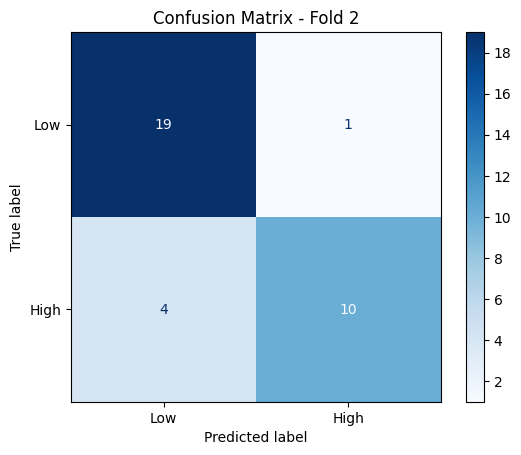


📊 Fold 2 Metrics:
Accuracy:  0.853
Precision: 0.909
Recall:    0.714
F1-Score:  0.800

Classification Report:
               precision    recall  f1-score   support

         Low       0.83      0.95      0.88        20
        High       0.91      0.71      0.80        14

    accuracy                           0.85        34
   macro avg       0.87      0.83      0.84        34
weighted avg       0.86      0.85      0.85        34



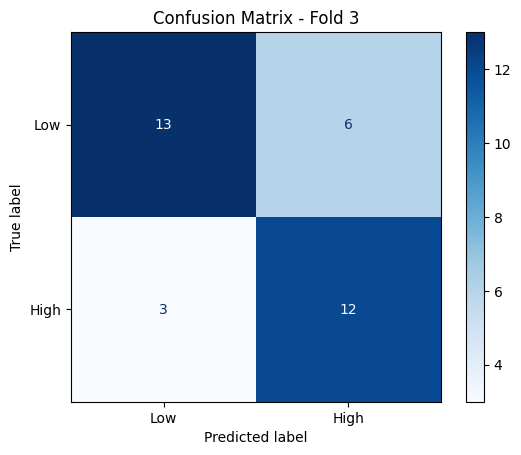


📊 Fold 3 Metrics:
Accuracy:  0.735
Precision: 0.667
Recall:    0.800
F1-Score:  0.727

Classification Report:
               precision    recall  f1-score   support

         Low       0.81      0.68      0.74        19
        High       0.67      0.80      0.73        15

    accuracy                           0.74        34
   macro avg       0.74      0.74      0.74        34
weighted avg       0.75      0.74      0.74        34



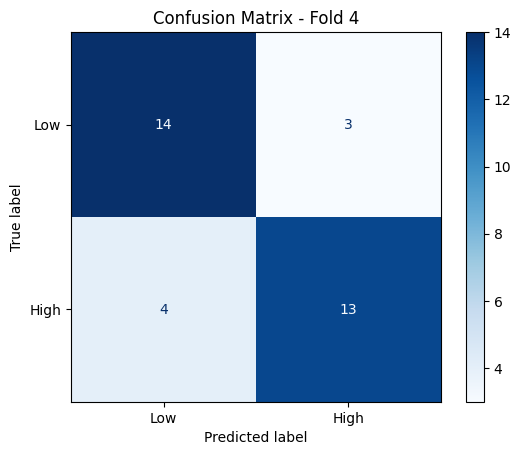


📊 Fold 4 Metrics:
Accuracy:  0.794
Precision: 0.812
Recall:    0.765
F1-Score:  0.788

Classification Report:
               precision    recall  f1-score   support

         Low       0.78      0.82      0.80        17
        High       0.81      0.76      0.79        17

    accuracy                           0.79        34
   macro avg       0.80      0.79      0.79        34
weighted avg       0.80      0.79      0.79        34



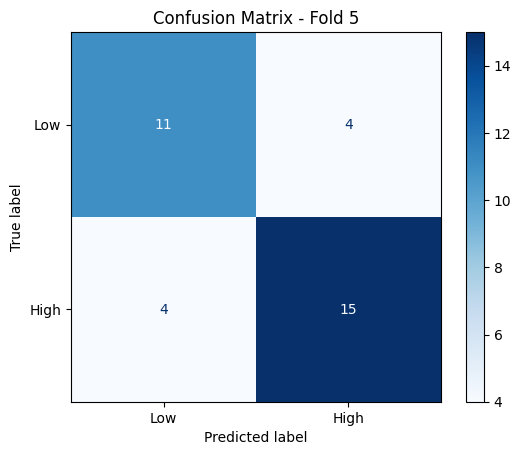


📊 Fold 5 Metrics:
Accuracy:  0.765
Precision: 0.789
Recall:    0.789
F1-Score:  0.789

Classification Report:
               precision    recall  f1-score   support

         Low       0.73      0.73      0.73        15
        High       0.79      0.79      0.79        19

    accuracy                           0.76        34
   macro avg       0.76      0.76      0.76        34
weighted avg       0.76      0.76      0.76        34



In [12]:
# ============================================================
# STEP 6: K-Fold Cross Validation with Random Forest
# ============================================================
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(random_state=42)

accuracies, precisions, recalls, f1s = [], [], [], []

fold = 1

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1s.append(f1)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'High'])
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - Fold {fold}")
    plt.show()

    print(f"\n📊 Fold {fold} Metrics:")
    print(f"Accuracy:  {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall:    {rec:.3f}")
    print(f"F1-Score:  {f1:.3f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Low', 'High']))
    fold += 1



✅ Average Performance Across 5 Folds:
Accuracy:  0.807
Precision: 0.836
Recall:    0.769
F1-Score:  0.796


/tmp/ipython-input-1839809799.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Score', data=metrics_df, palette='viridis')


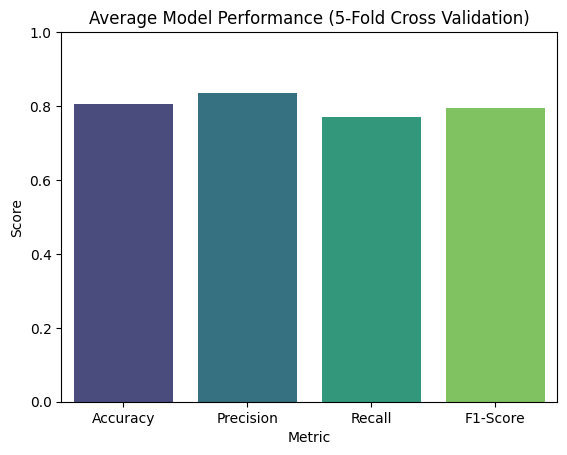

In [13]:
# ============================================================
# STEP 7: Average Performance Across Folds
# ============================================================
print("\n✅ Average Performance Across 5 Folds:")
print(f"Accuracy:  {np.mean(accuracies):.3f}")
print(f"Precision: {np.mean(precisions):.3f}")
print(f"Recall:    {np.mean(recalls):.3f}")
print(f"F1-Score:  {np.mean(f1s):.3f}")

# Plot the results
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Score': [np.mean(accuracies), np.mean(precisions), np.mean(recalls), np.mean(f1s)]
})

sns.barplot(x='Metric', y='Score', data=metrics_df, palette='viridis')
plt.title("Average Model Performance (5-Fold Cross Validation)")
plt.ylim(0, 1)
plt.show()
